# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Section 0: Load The Data

In [1]:
# Load pickled data
import pickle
import re as re

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file= 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'
sign_name_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

label_to_sign_name = dict()    
with open(sign_name_file, mode = 'r') as f:
    f.readline()
    for line in f:
        line = line.replace('\n', '')
        temp = re.split(',', line)
        label_to_sign_name[int(temp[0])] = temp[1]
        
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))
print()
print("Sign Labels    Names: ")
for e in label_to_sign_name:
    print(e, "            ", label_to_sign_name[e])


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples

Sign Labels    Names: 
0              Speed limit (20km/h)
1              Speed limit (30km/h)
2              Speed limit (50km/h)
3              Speed limit (60km/h)
4              Speed limit (70km/h)
5              Speed limit (80km/h)
6              End of speed limit (80km/h)
7              Speed limit (100km/h)
8              Speed limit (120km/h)
9              No passing
10              No passing for vehicles over 3.5 metric tons
11              Right-of-way at the next intersection
12              Priority road
13              Yield
14              Stop
15              No vehicles
16              Vehicles over 3.5 metric tons prohibited
17              No entry
18              General caution
19              Dangerous curve to the left
20              Dangerous curve to the right
21              Double curve
22              Bumpy road
23              Slippery ro

---

## Section1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Labels=  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Number of lables in train data=  43


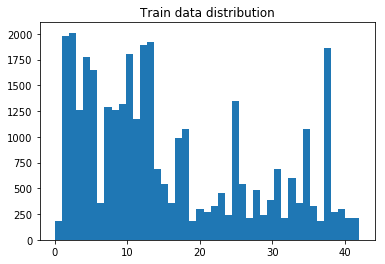

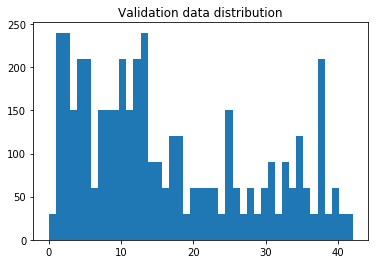

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


n_train = len(X_train)

n_validation = len(X_validation)

n_test = len(X_test)

image_shape = X_train[0].shape

classes = np.sort(np.unique(y_train))
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Labels= ", classes)
print("Number of lables in train data= ", n_classes)
#Plotting train set distribution
plt.hist(y_train, n_classes)
plt.title('Train data distribution')
plt.savefig('./examples/train_distribution.png')
plt.show()

#Plotting train set distribution
plt.hist(y_validation, n_classes)
plt.title('Validation data distribution')
plt.savefig('./examples/validation_distribution.png')
plt.show()


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Sign Label: 34, Sign Name: Turn left ahead


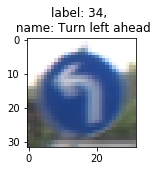

In [128]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

index = random.randint(0, len(X_train))
#index = 500
image = X_train[index].squeeze()
image_label_index = y_train[index]

plt.figure(figsize=(2,2))
plt.imshow(image)
plt.title('label: {}, \n name: {}'.format(image_label_index, label_to_sign_name[image_label_index]))
plt.savefig('./examples/random_sign.png')
print('Sign Label: {}, Sign Name: {}'.format(image_label_index, label_to_sign_name[image_label_index]))



## Section 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Section 2.1 Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Image Pre-proccessing helper functions

In [15]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
import cv2
from scipy import ndimage

def translate_image(image, t_x, t_y):
    rows, cols = image.shape[:2]
    M = np.float32([[1,0,t_x],[0,1,t_y]])
    translate_image = cv2.warpAffine(image,M,(cols,rows))
    return translate_image

def rotate_around_center(image, angle):
    #angel is in degree
    return ndimage.rotate(image, angle)

def brightness_augment(image, brightness_factor):
    ret_image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    ret_image = np.array(ret_image, dtype = np.float64)
    ret_image[:,:,2] = ret_image[:,:,2]*brightness_factor
    ret_image[:,:,2][ret_image[:,:,2]>255]  = 255
    ret_image = np.array(ret_image, dtype = np.uint8)
    ret_image = cv2.cvtColor(ret_image,cv2.COLOR_HSV2RGB)
    return ret_image

def get_brightness(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    return image1[:,:,2]

def convert_to_grayscale(image):
    rows, cols = image.shape[:2]
    return np.reshape(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (rows, cols, 1)) 

Here we plot distribution of the brighness of images in our training data set. We simply define the brightness of an image to be the average brithness of pixels in HSV mode, i.e. we get average over 32x32 = 1024 brithness values in HSV mode. 

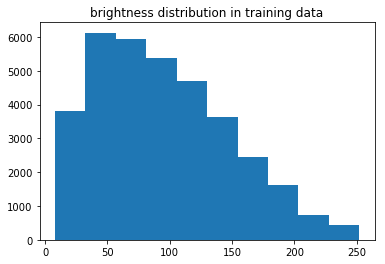

In [16]:
#plotting the brighness density
brightness = list()
for image in X_train:
    brightness.append(np.average(get_brightness(image)))
plt.hist(brightness)
plt.title('brightness distribution in training data')
plt.savefig('./examples/brightness_distribution.png')


#### enhancing the training data by random translation, rotation and change of brightness the image


In [17]:
import random as random

augmented_X_train = np.zeros((2 * len(X_train), 32, 32, 3), dtype=np.uint8)
augmented_y_train = np.zeros(2 * len(X_train), dtype=int)
translate_set = np.array(range(-7,8))
rotation_set = np.array(range(-15,16))

index = 0
for image, label in zip(X_train, y_train):
    t_x = random.choice(translate_set)
    t_y = random.choice(translate_set)
    brightness_factor = 0.5 + (1.5 * np.random.uniform())
    t_image = brightness_augment(image, brightness_factor)
    t_image = rotate_around_center(t_image, random.choice(rotation_set))
    t_image = translate_image(image, t_x, t_y)
    temp = 2*index
    augmented_X_train[temp] = image
    augmented_X_train[temp+1] = t_image
    augmented_y_train[temp] = label
    augmented_y_train[temp+1] = label
    index += 1    
    
print("Original Training Set:   {} samples".format(len(X_train)))
print("Augmented Training Set:   {} samples".format(len(augmented_X_train)))
        

Original Training Set:   34799 samples
Augmented Training Set:   69598 samples


#### Testing after traslate operation on training data

22559
Sign Label: 13, , Sign Name: Yield, brithness: 129.8544921875
Sign Label: 13, , Sign Name: Yield, brithness: 116.8212890625


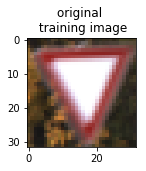

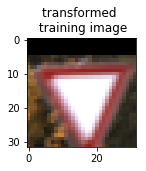

In [18]:
index = random.randint(0, len(X_train))
print(index)
image = augmented_X_train[2 * index].squeeze()
image_t = augmented_X_train[2 * index + 1].squeeze()

plt.figure(figsize=(2,2))
plt.title('original \n training image')
plt.imshow(image)
print("Sign Label: {}, , Sign Name: {}, brithness: {}".format(augmented_y_train[2 * index], label_to_sign_name[augmented_y_train[2 * index]], np.average(get_brightness(image))))
plt.savefig('./examples/before_augmentation.png')

plt.figure(figsize=(2,2))
plt.title('transformed \n training image')
plt.imshow(image_t)
print("Sign Label: {}, , Sign Name: {}, brithness: {}".format(augmented_y_train[2 * index + 1], label_to_sign_name[augmented_y_train[2 * index + 1]], np.average(get_brightness(image_t))))
plt.savefig('./examples/after_augmentation.png')

#plt.imshow(convert_to_grayscale(image_t).squeeze(), cmap = 'gray')


#### Here we normalized training, validation and test data

Here we normalized the data to be in the range of -1 and 1 by dividing it by max RGB value which is 255

In [19]:
# For Grayscaling
# normalized_augmented_X_train = list()
# for image in augmented_X_train:
#     normalized_augmented_X_train.append(convert_to_grayscale(image))

# normalized_augmented_X_train = np.array(normalized_augmented_X_train)
# normalized_augmented_X_train = (normalized_augmented_X_train / 255. - 0.5)
# normalized_augmented_y_train = np.copy(augmented_y_train)

# normalized_X_validation = list()
# for image in X_validation:
#     normalized_X_validation.append(convert_to_grayscale(image))

# normalized_X_validation = np.array(normalized_X_validation)
# normalized_X_validation = (normalized_X_validation / 255. - 0.5)
# normalized_y_validation = np.copy(y_validation)

# normalized_X_test = list()
# for image in X_test:
#     normalized_X_test.append(convert_to_grayscale(image))

# normalized_X_test = np.array(normalized_X_test)
# normalized_X_test = (normalized_X_test / 255. - 0.5)
# normalized_y_test = np.copy(y_test)
#-----------------------------------------------------------------

normalized_augmented_X_train = (augmented_X_train / 255. - 0.5)
normalized_augmented_y_train = np.copy(augmented_y_train)

normalized_X_train = (X_train / 255. - 0.5)
normalized_y_train = np.copy(y_train)

normalized_X_validation = (X_validation / 255. - 0.5)
normalized_y_validation = np.copy(y_validation)

normalized_X_test = (X_test / 255. - 0.5)
normalized_y_test = np.copy(y_test)

### Section 2.2 Model Architecture

In [73]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    filter_count_0 = 4
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1, 1, 3, filter_count_0), mean = mu, stddev = sigma))
    conv0_b = tf.Variable(tf.zeros(filter_count_0))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1, 1, 1, 1], padding='VALID') + conv0_b
    
    # Activation.
    conv0_a = tf.nn.relu(conv0)
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x(filter_count_1).
    filter_count_1 = 8
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, filter_count_0, filter_count_1), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(filter_count_1))
    conv1   = tf.nn.conv2d(conv0_a, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1_a = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x(filter_count_1). Output = 14x14x(filter_count_1).
    conv1_a = tf.nn.max_pool(conv1_a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


    # Layer 2: Convolutional. Output = 10x10x(filter_count_2).
    filter_count_2 = 64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, filter_count_1, filter_count_2), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(filter_count_2))
    conv2   = tf.nn.conv2d(conv1_a, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2_a = tf.nn.relu(conv2)

    # Layer 3: Convolutional. Output = 8x8x(filter_count_3).
    filter_count_3 = 128
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, filter_count_2, filter_count_3), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(filter_count_3))
    conv3   = tf.nn.conv2d(conv2_a, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Activation.
    conv3_a = tf.nn.relu(conv3)    
    
    # Pooling. Input = 8x8x(filter_count_3). Output = 4x4x(filter_count_3).
    conv3_a = tf.nn.max_pool(conv3_a, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 4x4x(filter_count_3). Output = 2048.
    fc0   = flatten(conv3_a)
    
    # Layer 3: Fully Connected. Input = 2048. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2048, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    #Dropout.
    fc1_dropout = tf.nn.dropout(fc1, keep_probability)
    
    # Layer 4: Fully Connected. Input = 256. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1_dropout, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    #Dropout.
    fc2_dropout = tf.nn.dropout(fc2, keep_probability)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_dropout, fc3_W) + fc3_b
    
    return logits, conv0, conv0_W, conv1, conv1_W, conv2, conv2_W, conv3, conv3_W, fc1_W, fc2_W, fc3_W



# Section 3 Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Tensorflow Placeholders

In [74]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#keep Dropout Probability placeholder
keep_probability = tf.placeholder(tf.float32)

#learning_rate
#we try to dynamically decrease learning rate during the training operation
learning_rate = tf.placeholder(tf.float32)


### Training Pipeline

In [75]:
#rate = tf.placeholder(tf.float32)
#learning_rate = 0.001

logits, conv0, conv0_W, conv1, conv1_W, conv2, conv2_W, conv3, conv3_W, fc1_W, fc2_W, fc3_W = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)

#Adding regularizer
beta = 0.001
regularizer = tf.nn.l2_loss(fc1_W) + tf.nn.l2_loss(fc2_W) + tf.nn.l2_loss(fc3_W) 
loss_operation = tf.reduce_mean(loss_operation + (beta * regularizer))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [76]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_probability: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Can OverFit on small part of data?
Here we try to see if we can overfit to small portion of the training data to see if the model is complex enough

Training...


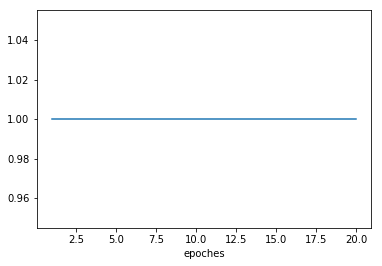

Model saved
Training Time is  0:00:18.752627


In [77]:
from sklearn.utils import shuffle
from datetime import datetime

model_file_name = './traffic_sign'
start_time=datetime.now()
saver = tf.train.Saver()
# X_train, y_train = shuffle(X_train, y_train)
# small_X_train = X_train[:20]
# small_y_train = y_train[:20]
small_X_train = normalized_augmented_X_train[:200]
small_y_train = normalized_augmented_y_train[:200]

EPOCHS = 20
BATCH_SIZE = 128
rate = 0.002
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(small_X_train)
    print("Training...")
    training_accuracies = list()
    epoches_axis = range(1,EPOCHS + 1)
    for i in range(EPOCHS):
        small_X_train, small_y_train = shuffle(small_X_train, small_y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = small_X_train[offset:end], small_y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_probability: 0.5, learning_rate: rate})
        
        #----
        training_accuracy = evaluate(small_X_train, small_y_train)
        training_accuracies.append(training_accuracy)
        
    #ploting 
    plt.plot(epoches_axis, training_accuracies, label='Training accuracy')
    plt.xlabel('epoches')
    plt.show()
    #saving the overfitt model
    saver.save(sess, model_file_name)
    print("Model saved")
    

print('Training Time is ', datetime.now() - start_time)    

### Train the Model

In [78]:
def do_training(X_train_data, y_train_data, X_validation_data, y_validation_data, EPOCHS, BATCH_SIZE, model_file_name):
    saver = tf.train.Saver()
    start_time=datetime.now()
    print("Training is started at ", start_time)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train_data)
        rate = 0.002
        training_accuracies = list()
        validation_accuracies = list()
        epoches_axis = range(1,EPOCHS + 1)
        for i in range(EPOCHS):
            X_train_data, y_train_data = shuffle(X_train_data, y_train_data)
            if((i+1) % 9 == 0):
                rate /= 2
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train_data[offset:end], y_train_data[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_probability: 0.5, learning_rate: rate})
        
            #----
            training_accuracy = evaluate(X_train_data, y_train_data)
            training_accuracies.append(training_accuracy)
        
            validation_accuracy = evaluate(X_validation_data, y_validation_data)
            validation_accuracies.append(validation_accuracy)
        
            print("EPOCH {}, learning_rate = {:.5f}".format((i+1), rate))
            print("Training Accuracy = {:.5f}".format(training_accuracy), ", Validation Accuracy = {:.5f}".format(validation_accuracy))
            print()
        #ploting 
        plt.plot(epoches_axis, training_accuracies, label='Training accuracy')
        plt.plot(epoches_axis, validation_accuracies, label='Validation accuracy')
        plt.title('Training vs Validation accuracy')
        plt.xlabel('epoches')
        plt.savefig('./examples/train_vs_validation_accuracy.png')
        plt.show()
    
        saver.save(sess, model_file_name)
        print("Model saved")
    
    print('Training Time is ', datetime.now() - start_time)    

#### Some prameters, and running the training procedure:

Training is started at  2017-03-26 23:36:33.074830
EPOCH 1, learning_rate = 0.00200
Training Accuracy = 0.47165 , Validation Accuracy = 0.44512

EPOCH 2, learning_rate = 0.00200
Training Accuracy = 0.81968 , Validation Accuracy = 0.83900

EPOCH 3, learning_rate = 0.00200
Training Accuracy = 0.94087 , Validation Accuracy = 0.92993

EPOCH 4, learning_rate = 0.00200
Training Accuracy = 0.96605 , Validation Accuracy = 0.94626

EPOCH 5, learning_rate = 0.00200
Training Accuracy = 0.98269 , Validation Accuracy = 0.96054

EPOCH 6, learning_rate = 0.00200
Training Accuracy = 0.98967 , Validation Accuracy = 0.97528

EPOCH 7, learning_rate = 0.00200
Training Accuracy = 0.98602 , Validation Accuracy = 0.97256

EPOCH 8, learning_rate = 0.00200
Training Accuracy = 0.98611 , Validation Accuracy = 0.96168

EPOCH 9, learning_rate = 0.00100
Training Accuracy = 0.99716 , Validation Accuracy = 0.98254

EPOCH 10, learning_rate = 0.00100
Training Accuracy = 0.99741 , Validation Accuracy = 0.98118

EPOCH 11

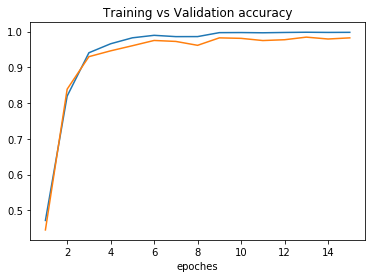

Model saved
Training Time is  0:31:13.622015


In [79]:
EPOCHS = 15
BATCH_SIZE = 128
model_file_name = './traffic_sign'
#do_training(X_train, y_train, X_validation, y_validation, EPOCHS, BATCH_SIZE, model_file_name)
#do_training(augmented_X_train, augmented_y_train, X_validation, y_validation, EPOCHS, BATCH_SIZE, model_file_name)
do_training(normalized_augmented_X_train, normalized_augmented_y_train, normalized_X_validation, normalized_y_validation, EPOCHS, BATCH_SIZE, model_file_name)
#do_training(normalized_X_train, normalized_y_train, normalized_X_validation, normalized_y_validation, EPOCHS, BATCH_SIZE, model_file_name)



### Visualizing Weights in the convolutional neural netweork

Here we can simply visualize the distribution of the weights used in each layer of the model. The only pupose of this section is to see if we need to add regularization to penalties big weights if they exists in any layer.

[[[[ 0.32778111  0.69138074  0.08951745 -0.38295594]
   [-0.3579779   1.24165666  0.14888066 -0.0748416 ]
   [-0.22320557  0.73379624 -0.25762537  0.26463041]]]]


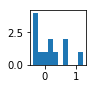

max= 1.24166 min= -0.382956


In [81]:
#conv1_W, conv2_W, fc1_W, fc2_W, fc3_W
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    filter_summary = sess.run(conv0_W)
    print(filter_summary)
    plt.figure(figsize=(1,len(filter_summary)))
    filter_summary = np.ndarray.flatten(filter_summary)
    plt.hist(filter_summary)
    plt.show()
    print("max=", max(filter_summary), "min=", min(filter_summary))


### Overall Test Accuracy

In [82]:
print("number of test images: {}".format(len(normalized_X_test)))
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(normalized_X_test, normalized_y_test)
    print("model overall perfomance accuracy = {:.5f}".format(test_accuracy))

number of test images: 12630
model overall perfomance accuracy = 0.96097


### Label Class Test Accuracy

Here, for any label class, we compute number of test examples that correctly classified on this class, and we compute the accuracy of the each class by simply dividing the number of correctly classified traffic signs in this label class by corresponding number of the traffic sign in the label class in our test data. Note that this analysis give us better understanding that on which traffic-sign our model does a good job and where its week points. This analysis could be useful if in future we want to ensemble models since we know strong and weak points of our model.  

In [83]:
def evaluate_class_accuracy(X_data, y_data, n_classes):
    '''Note that we implicilty assume class identifier starts at 0.
    correct_prediction_frequency, frequency, class_accuracy are going to be np.array of length n_class
    where they eventual represent number of correctly classified examples, number of examples and accuracy of each label class, respectively.'''
    
    #defining the tensor for getting the label
    prediction = tf.cast(tf.argmax(logits, 1), tf.int32)
    correct_prediction_frequency =  np.zeros(n_classes)
    frequency = np.zeros(n_classes)
    class_accuracy= np.zeros(n_classes)
    num_examples = len(X_data)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        predict = sess.run(prediction, feed_dict={x: batch_x, y: batch_y, keep_probability: 1.})
        for i in range(len(batch_y)):
            frequency[batch_y[i]] += 1
            if batch_y[i] == predict[i]:
                correct_prediction_frequency[predict[i]] += 1
    
    for i in range(n_classes):
        if frequency[i] > 0:
            class_accuracy[i] = correct_prediction_frequency[i] / frequency[i]
    return correct_prediction_frequency, frequency, class_accuracy

In [84]:
def summerize_class_accuracy(small_X, small_y, n_classes):
    correct_prediction_frequency, frequency, class_accuracy = evaluate_class_accuracy(small_X, small_y, n_classes)
    print("correct_prediction_frequency: {}".format(correct_prediction_frequency))
    print("frequency:                    {}".format(frequency))
    print("class_accuracy:               {}".format(class_accuracy))
    bestIndex = np.argmax(class_accuracy)
    print("best class accuracy is {:.5f} for class label= {}, traffic-sign name= {}".format(class_accuracy[bestIndex], bestIndex, label_to_sign_name[bestIndex]))
    worstIndex = np.argmin(class_accuracy)
    print("worst class accuracy is {:.5f} for class label= {}, traffic-sign name= {}".format(class_accuracy[worstIndex], worstIndex, label_to_sign_name[worstIndex]))
    print("overall accuracy:             {:.5f}".format(sum(correct_prediction_frequency)/ sum(frequency)))
    print()
    #ploting bar chart
    xaxis = np.array(range(len(class_accuracy)))
    plt.figure(figsize=(15,10))
    plt.bar(xaxis, (100 * class_accuracy).astype(int), align='center', width = 0.3, color= 'r', alpha=0.6)
    plt.ylabel("accuracy")
    plt.title('Test Accuracy on each label class')
    plt.xticks(xaxis, label_to_sign_name.items(), rotation='vertical')
    plt.savefig('./examples/class_test_accuracy.png')
    plt.show()
    
    
    

#### Computing Model Accuracy in each label class

correct_prediction_frequency: [  52.  719.  732.  430.  644.  596.  120.  414.  432.  479.  644.  396.
  665.  717.  270.  208.  150.  336.  343.   48.   90.   60.  109.  149.
   81.  466.  179.   44.  148.   88.  125.  269.   60.  209.  120.  389.
  120.   60.  678.   88.   87.   48.   75.]
frequency:                    [  60.  720.  750.  450.  660.  630.  150.  450.  450.  480.  660.  420.
  690.  720.  270.  210.  150.  360.  390.   60.   90.   90.  120.  150.
   90.  480.  180.   60.  150.   90.  150.  270.   60.  210.  120.  390.
  120.   60.  690.   90.   90.   60.   90.]
class_accuracy:               [ 0.86666667  0.99861111  0.976       0.95555556  0.97575758  0.94603175
  0.8         0.92        0.96        0.99791667  0.97575758  0.94285714
  0.96376812  0.99583333  1.          0.99047619  1.          0.93333333
  0.87948718  0.8         1.          0.66666667  0.90833333  0.99333333
  0.9         0.97083333  0.99444444  0.73333333  0.98666667  0.97777778
  0.83333333  0.996

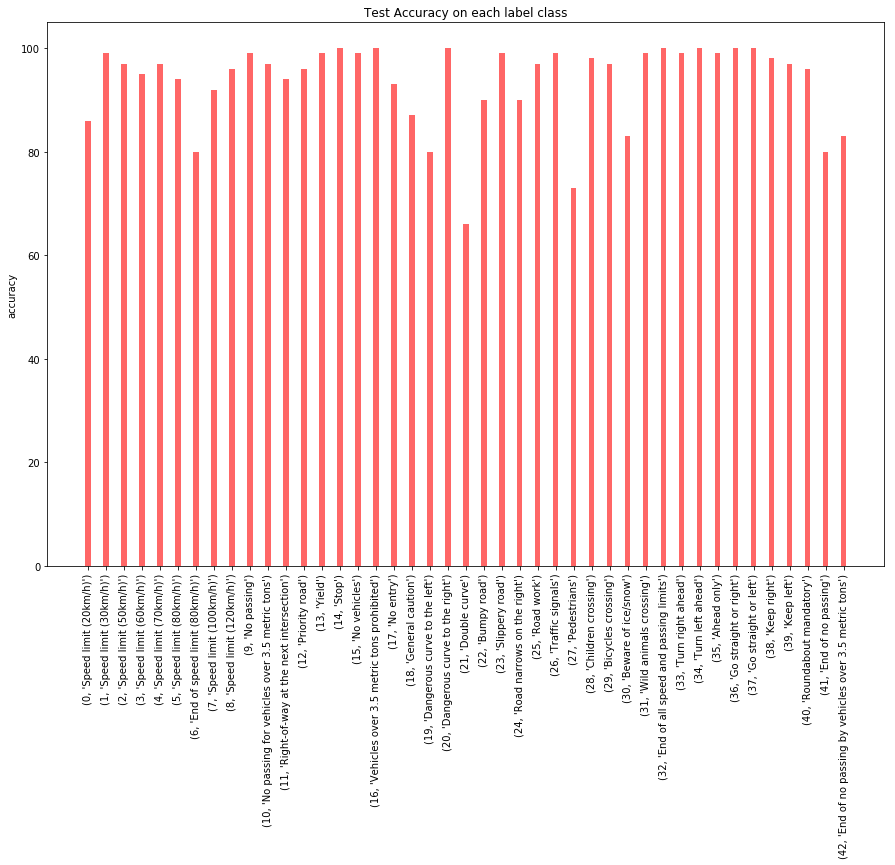

In [85]:
normalized_X_test, normalized_y_test = shuffle(normalized_X_test, normalized_y_test)
#X_test_example = normalized_X_test[12:13]
#y_test_example = normalized_y_test[12:13]
X_test_example = normalized_X_test
y_test_example = normalized_y_test
n_classes = 43
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    summerize_class_accuracy(X_test_example, y_test_example, n_classes)
    


## Section 4: Test a Model on New Images

In this section we got five new images of traffic signs from web, and we test the performance the model on these new five images.


### Load and Output the Images

In [119]:
import matplotlib.image as mpimg
import os
input_directory_address = "examples/" 
allFieles = os.listdir(input_directory_address)
sample_images = list()
#Name of our downloaded image are sign#.jpg
for image_file in allFieles:
    if "sign" in image_file: 
        original_image_address = input_directory_address + image_file
        image = mpimg.imread(original_image_address)
        #image = np.copy(image)
        sample_images.append(image)
        print("image_name: {}, sahpe: {}".format(image_file, image.shape))

image_name: sign1.jpg, sahpe: (478, 359, 3)
image_name: sign2.jpg, sahpe: (478, 359, 3)
image_name: sign3.jpg, sahpe: (507, 338, 3)
image_name: sign4.jpg, sahpe: (509, 339, 3)
image_name: sign5.jpg, sahpe: (478, 359, 3)
image_name: sign6.jpg, sahpe: (478, 359, 3)
image_name: sign7.jpg, sahpe: (478, 359, 3)
image_name: sign8.jpg, sahpe: (180, 240, 3)
image_name: sign9.jpg, sahpe: (359, 478, 3)


#### Platting the original sample images 

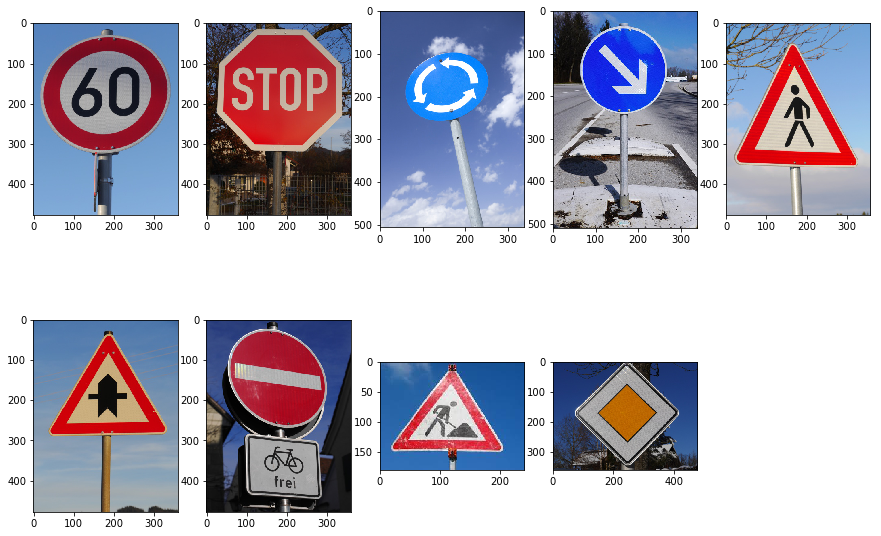

In [120]:
#plotting the images
plt.figure(figsize=(15,10))
sub_plt_y= 5
sub_plt_x= (len(sample_images) / sub_plt_y) + 1 
current_index = 0;
for image in sample_images:
    plt.subplot(sub_plt_x,sub_plt_y, (current_index+1))
    plt.imshow(image.squeeze())
    current_index += 1
plt.show()

#### Resizing sample images to 32x32 and plot them

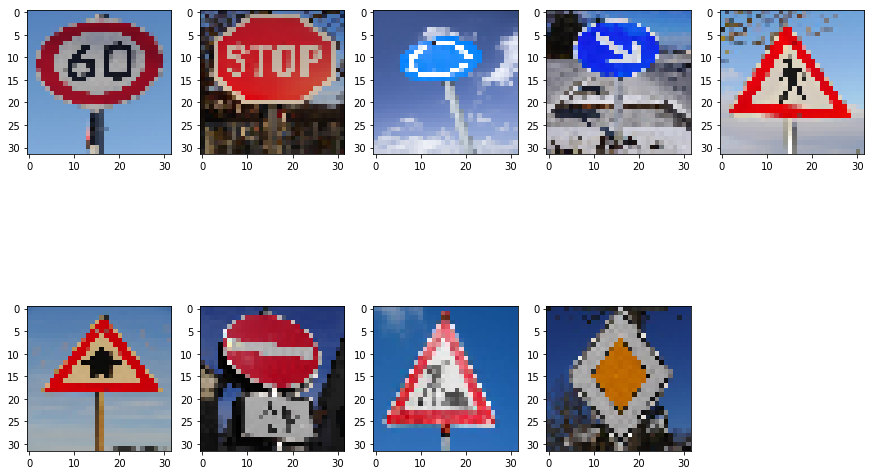

In [121]:
# X_test, y_test = shuffle(X_test, y_test)
# sample_images = X_test[1:10]
# actual_labels = y_test[1:10]

actual_labels = np.array([3, 14, 40, 38, 27, 11, 17, 25, 12])
plt.figure(figsize=(15,10))
current_index = 0;
resized_images = list()
for image in sample_images:
    #resizing
    resized_image = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    #converting to gray scale
    #resized_image = convert_to_grayscale(resized_image)
    resized_images.append(resized_image)
    plt.subplot(sub_plt_x,sub_plt_y, ((current_index)+1))
    plt.imshow(resized_image.squeeze())
    current_index += 1
    
plt.show()

### Predict the Sign Type for Each Image

In [122]:
#normlizing
normlized_sample_iamges = list()
for image in resized_images:
    image_normal = ((image / 255.) - 0.5)
    normlized_sample_iamges.append(image_normal)    
normlized_sample_iamges = np.array(normlized_sample_iamges)
print(normlized_sample_iamges.shape)


(9, 32, 32, 3)


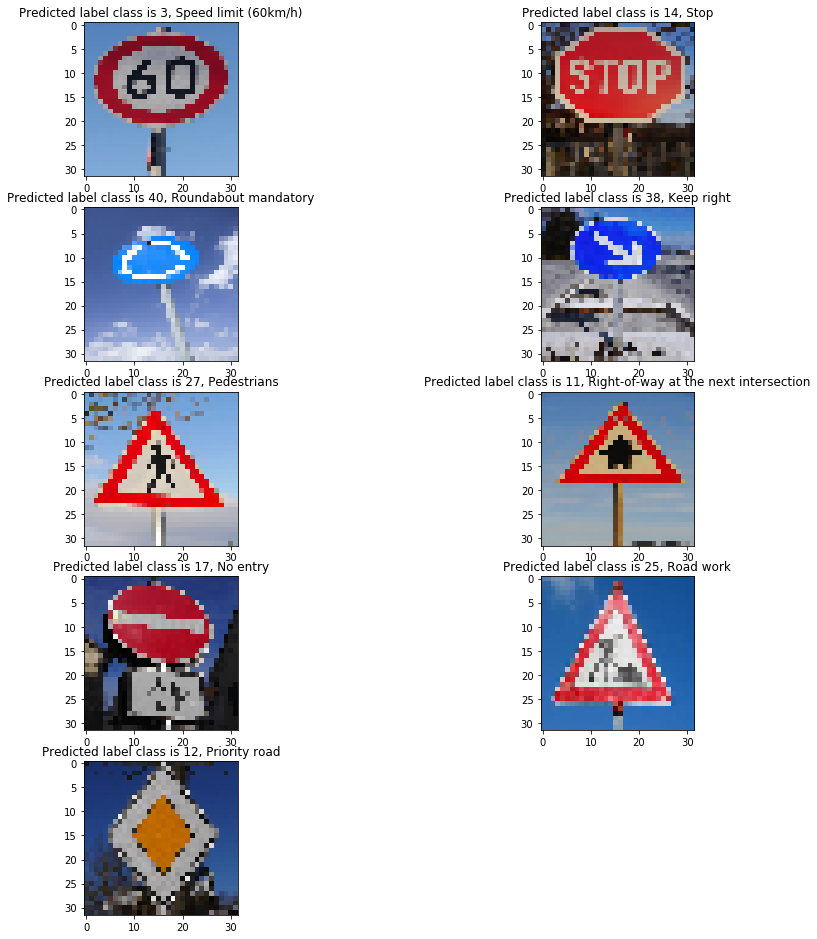

In [123]:
#prediction
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    prediction = tf.cast(tf.argmax(logits, 1), tf.int32)
    predicted_labels = sess.run(prediction, feed_dict={x: normlized_sample_iamges, keep_probability: 1.})    
    #plotting images with their predicted values
    sub_plt_x = len(normlized_sample_iamges)
    current_index = 0
    plt.figure(figsize=(15,30))
    for image in resized_images:  
        plt.subplot(sub_plt_x, 2, ((current_index)+1))
        plt.imshow(image.squeeze())
        plt.title("Predicted label class is {}, {}".format(predicted_labels[current_index], label_to_sign_name[predicted_labels[current_index]]))
        current_index += 1
    plt.savefig('./examples/predicted_images.png')
    plt.show()
    

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web (Test data)

In [124]:
def top_k_softmax(X_data, y_data, top_k_value):
    '''
        top_k_value is the parameter to find the top_k softmax values for each image in X_data
        values, indices, actuals are lists of size len(X_data) where 
        values represents top_k soft max values for the corresponding image
        indices represents the indices, or labels corresponding for each top_k soft max values for the corresponding image
        actuals represents the actual label of the corresponding image 
    '''
    num_examples = len(X_data)
    values = list()
    indices = list()
    actuals = list()
    
    soft_max_probability = tf.nn.softmax(logits)
    top_k = tf.nn.top_k(soft_max_probability, k=top_k_value)
    
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        topk = sess.run(top_k, feed_dict={x: batch_x, y: batch_y, keep_probability: 1.})
        for v in topk.values:
            values.append(v)
        for ind in topk.indices:
            indices.append(ind)
        for actual in batch_y:
            actuals.append(actual)
    return values, indices, actuals

#### Running the top-k softmax

softmax probabilities:  [  1.00000000e+00   6.02927105e-13   2.97591033e-14   3.10494369e-15
   1.21938789e-15]
sign names:  ['Speed limit (60km/h)', 'Dangerous curve to the right', 'Keep left', 'Speed limit (80km/h)', 'Bicycles crossing']
--------------------------------------
softmax probabilities:  [  9.99999881e-01   2.72352754e-08   2.27784618e-08   1.99044443e-08
   4.54241711e-09]
sign names:  ['Stop', 'Bicycles crossing', 'No vehicles', 'Speed limit (60km/h)', 'No entry']
--------------------------------------
softmax probabilities:  [  9.99137640e-01   4.07447718e-04   2.89027055e-04   7.46771620e-05
   6.21856452e-05]
sign names:  ['Roundabout mandatory', 'Keep left', 'Children crossing', 'Go straight or left', 'Turn right ahead']
--------------------------------------
softmax probabilities:  [  1.00000000e+00   5.99094718e-10   6.48344087e-11   1.74759491e-12
   2.91659410e-13]
sign names:  ['Keep right', 'Turn left ahead', 'Priority road', 'No passing for vehicles over 3.5 

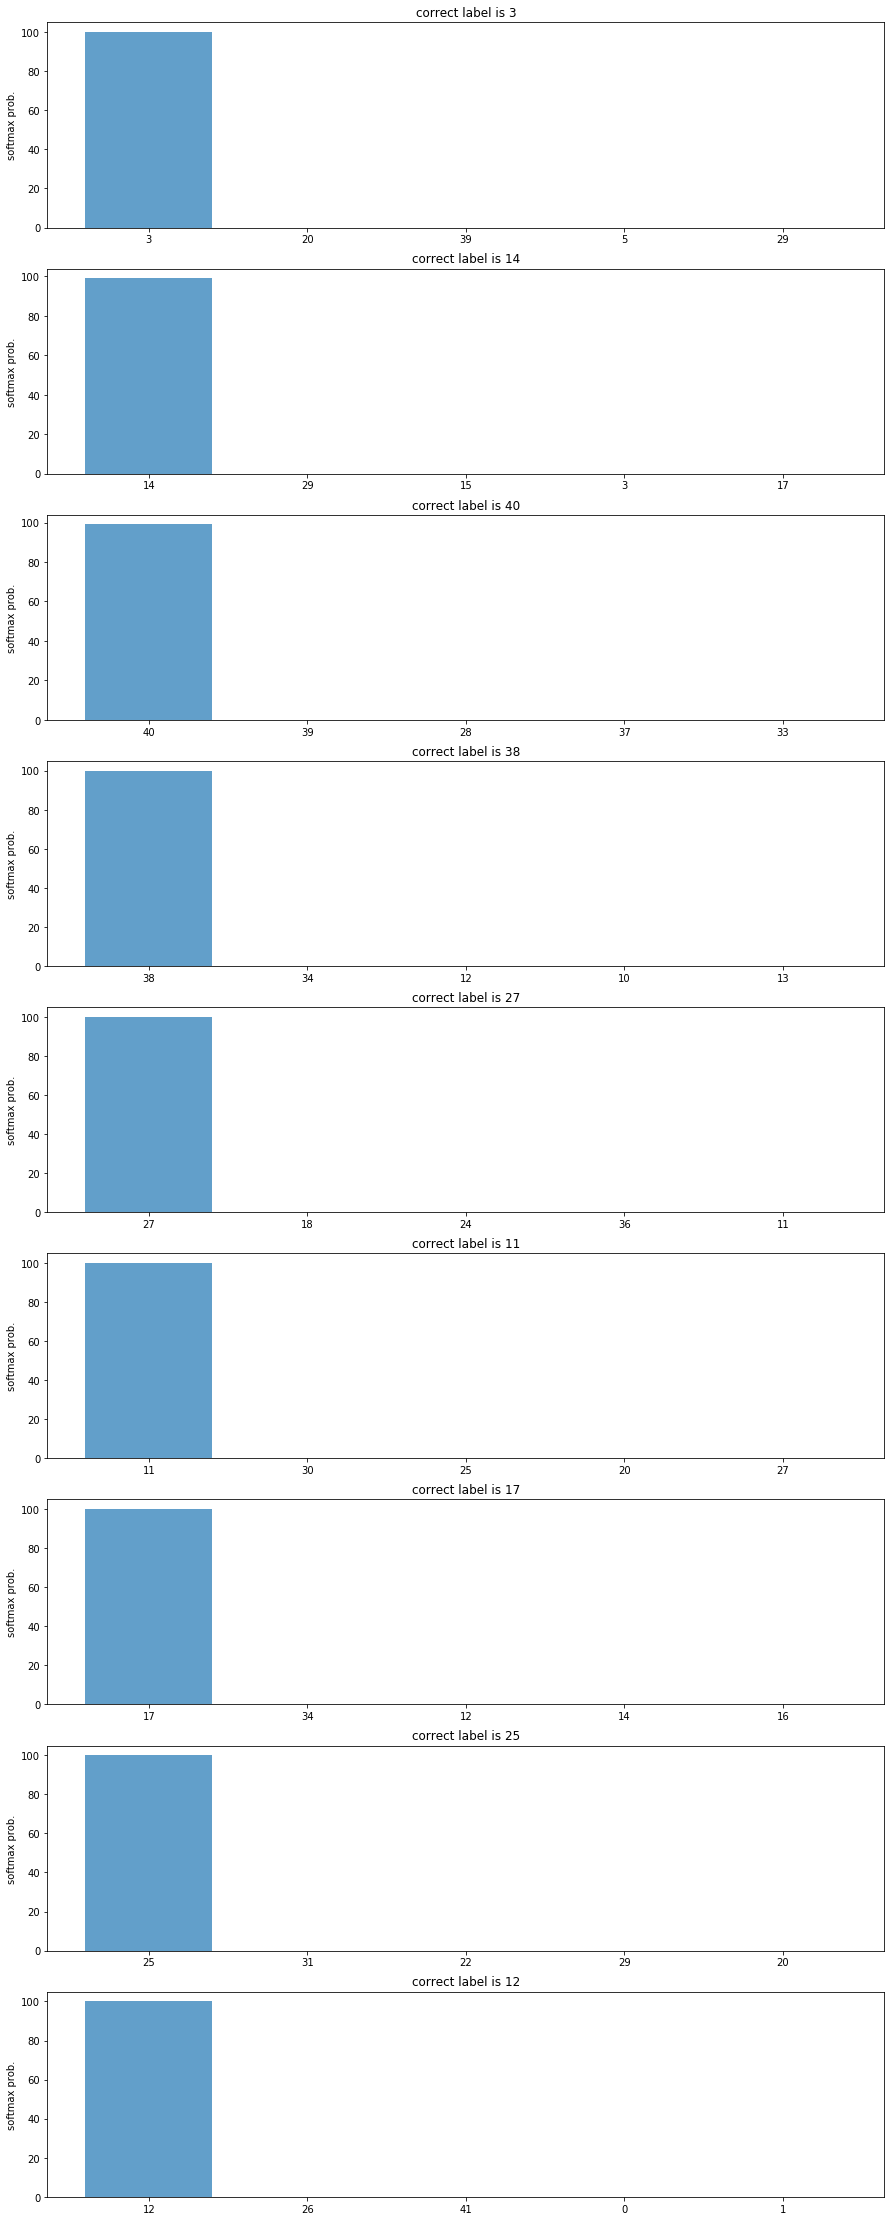

In [125]:
#X_test_example = normalized_X_test
#y_test_example = normalized_y_test
X_test_example = normlized_sample_iamges
y_test_example = actual_labels
assert(len(X_test_example) == len(y_test_example))
top_k_value = 5
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    values, indices, actuals = top_k_softmax(X_test_example, y_test_example, top_k_value)
    num_examples = len(X_test_example)
    assert(num_examples == len(values) == len(indices) == len(actuals))
    xaxis = np.arange(top_k_value)
    plt.figure(figsize=(15,40))
    current_index = 0
    for pvs, inds, actual in zip(values, indices, actuals):
        plt.subplot(num_examples,1, (current_index+1))
        plt.bar(xaxis, (100 * pvs).astype(int), align='center', alpha=0.7)
        plt.ylabel("softmax prob.")
        plt.title('correct label is {}'.format(actual))
        plt.xticks(xaxis, inds)
        current_index += 1
        #==========================================
        #this part of code only print the values and label names 
        #to make building the write-up easier 
        print('softmax probabilities: ', pvs)
        top_names = list()
        for e in inds:
            top_names.append(label_to_sign_name[e])
        print('sign names: ', top_names)
        print('--------------------------------------')
        #===========================================
    plt.savefig('./examples/softmax_bars.png')
    plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.


In [126]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1, sub_plt_x=8, sub_plt_y=8):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    sess = tf.get_default_session()
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,10))
    for featuremap in range(featuremaps):
        plt.subplot(sub_plt_x,sub_plt_y, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max)
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min)
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest")
        plt.savefig('./examples/conv_layer_visualization.png')

### Running the Visualization

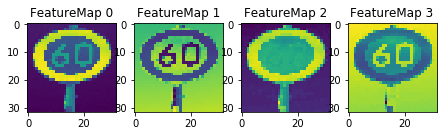

In [127]:
#X_test_example = normalized_X_test[1:2]
X_test_example = normlized_sample_iamges[:1] 
#small_y_test = y_test[:2]
#print(X_test.shape)
#print(y_test.shape)

image_input = X_test_example 
tf_activation = conv0
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sub_plt_count = int(tf_activation.shape[3])
    sub_plt_x = int((sub_plt_count / 8) + 1)
    outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 , plt_num=1, sub_plt_x = sub_plt_x , sub_plt_y = 8)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


Answer: By looking at the visualization, we can see model learned which part of the images are more interesting to consider. I personally really like the 1x1 convolution, where each filter smartly specialized in different aspect of the image. Another idea, which didn't worked for me as well as 1x1 filters is that, by looking at convolution visualization, it is easy to see that the colors appeared in them are very limited, so that 
suggest grayscale has good chance to succeed.  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 